http://web.stanford.edu/class/cs224n/assignment1/assignment1_soln.pdf

# (a) 

Let's use row vector, then

$$
\hat y_o = p(o|c) = \frac{exp(u_o v_c^T)}{\sum_{w=1}^W exp(u_w v_c^T)}
$$

$$
U = \begin{bmatrix}
u_1 \\ 
u_2 \\ 
\vdots \\ 
u_W \\
\end{bmatrix}
$$

Suppose the dimensions of the volcabulary and $v_c$ are $W$ and $D$, and $\theta$ be a $W$-dimension row vector.

$$
\frac{\partial J}{\partial v_c} = \frac{\partial J}{\partial \hat y} \frac{\partial \hat y}{\partial \theta} \frac{\partial \theta}{\partial v_c}
$$

Based on question 2,

$$\frac{\partial J}{\partial \hat y} \frac{\partial \hat y}{\partial \theta}  = \hat y - y$$

which is of shape $1 \times W$.

According to the definition of skipgram model,

$$
\theta = [u_1 v_c^T, \cdots, u_0 v_c^T, \cdots, u_W v_c^T]
$$

and

$$
\frac{\partial \theta}{\partial v_c} = U = \begin{bmatrix}
u_1 \\ 
u_2 \\ 
\vdots \\ 
u_W \\
\end{bmatrix} = U
$$

which has a shape of $W\times D$

So

$$ 
\frac{\partial J}{\partial v_c} = (\hat y - y) U
$$

The shape transformation: $(1 \times W) (W \times D)$

# (b)

Similar to (a),

$$
\frac{\partial \theta}{\partial u_i} = \begin{bmatrix}
- 0 - \\ 
\vdots \\ 
v_c\\
\vdots \\ 
- 0- \\
\end{bmatrix}
$$
The derivative matrix is zero everywhere but at row $i$

Then,

$$
\frac{\partial J}{\partial u_i} = (\hat y - y)\begin{bmatrix}
- 0 - \\ 
\vdots \\ 
v_c\\
\vdots \\ 
- 0- \\
\end{bmatrix} = (\hat y - y)_i v_c
$$

which is shape $1 \times D$

Then, $\frac{\partial J}{\partial U}$ is just about stacking all $(\hat y - y)_i v_c$ together to get a $W \times D$ matrix,

$$
\frac{\partial J}{\partial U} = \begin{bmatrix}
\partial J / \partial u_0 \\ 
\vdots \\ 
\partial J / \partial u_W \\ 
\end{bmatrix} = (\hat y - y)^T v_c
$$

# (c)

Given
$$
J_{neg-sample}(o, v_c, U) =  - \bigg(\mathrm{log}(\sigma(u_o^T v_c)) + \sum_{k=1}^K \mathrm{log}(\sigma(-u_k^T v_c)) \bigg)
$$

Then,

\begin{align*}
\frac{\partial J}{\partial v_c}
&= - \bigg(\frac{1}{\sigma(u_o^T v_c)} \frac{\partial \sigma(u_o^T v_c)}{\partial \theta} \frac{\partial \theta}{\partial v_c} 
+ \sum_{k=1}^K \frac{1}{\sigma(-u_k^T v_c)} \frac{\partial \sigma(-u_k^T v_c)}{\partial \theta} \frac{\partial \theta}{\partial v_c}(-1)     \bigg) \\
&= -\bigg(\frac{1}{\sigma(u_o^T v_c)} \sigma(u_o^T v_c) (1 - \sigma(u_o^T v_c)) u_o - \sum_{k=1}^K \frac{1}{\sigma(-u_k^T v_c)} \sigma(-u_k^T v_c) (1 - \sigma(-u_k^T v_c)) u_k \bigg) \\
&= (\sigma(u_o^T v_c) - 1)u_o - \sum_{k=1}^K (\sigma(-u_k^T v_c) - 1)u_k \\
\frac{\partial J}{\partial u_o}
&= (\sigma(u_o^T v_c) - 1)v_c \\
\frac{\partial J}{\partial u_k}
&= -(\sigma(-u_k^T v_c) - 1)v_c \;\;\;\; \text{for all } k = 1, 2, 3, ..., K
\end{align*}


Negative sampling is much more efficient softmax-CE loss because it avoids calculating the sum of exponentials over the whole vocabulary.

# (d)

### Skip-gram

Predict surrounding words given the center word.

$$
J_{skip-gram}(\mathrm{word}_{c-m}, ... ,{c+m}) = \sum_{-m \le j \le m, j \ne 0} F(w_{c+j}, v_c)
$$

\begin{align*}
\frac {\partial J_{skip-gram}(\mathrm{word}_{c-m}, ... ,{c+m})}{\partial v_c} 
&= \sum_{-m \le j \le m, j \ne 0} \frac{\partial F(w_{c+j}, v_c)}{\partial v_c} \\
&= \sum_{-m \le j \le m, j \ne 0} (\hat y - y) U \\
\frac {\partial J_{skip-gram}(\mathrm{word}_{c-m}, ... ,{c+m})}{\partial U}
&= \sum_{-m \le j \le m, j \ne 0} (\hat y - y)^T v_c
 \end{align*}

TODO

### CBOW (Continuous Bag of Words)

Predict the center word given the surrounding words.

Given

$$
\hat v = \sum_{-m \le j \le m, j \ne 0} v_{c+j}
$$
$$
J_{CBOW}(\mathrm{word}_{c-m, ..., c+m}) = F(w_c, \hat v)
$$

\begin{align*}
\frac {\partial J_{CBOW}(\mathrm{word}_{c-m}, ... ,{c+m})}{\partial \hat v} 
&= \sum_{-m \le j \le m, j \ne 0} \frac{\partial F(w_{c+j}, \hat v)}{\partial \hat v} \\
&= \sum_{-m \le j \le m, j \ne 0} (\hat y - y) U \\
\frac {\partial J_{CBOW}(\mathrm{word}_{c-m}, ... ,{c+m})}{\partial U}
&= \sum_{-m \le j \le m, j \ne 0} (\hat y - y)^T \hat v
 \end{align*}

TODO

# (e), (f) are programming exercises

# (g)

In [1]:
from IPython.display import display, Image, HTML

Trained word vector image

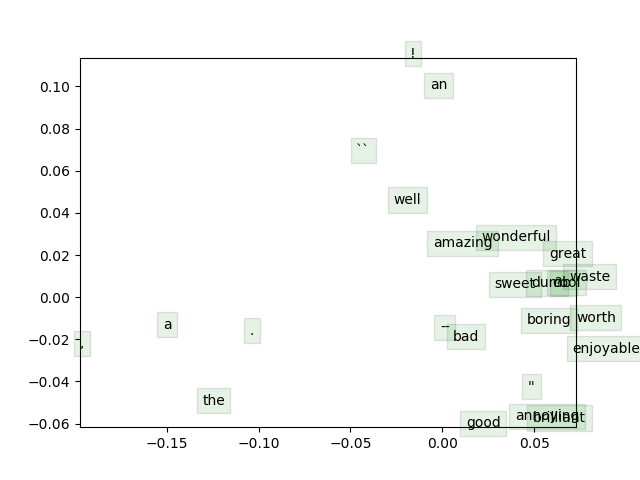

In [3]:
Image('./q3_word_vectors.png')

Words with similar semantic meanings tend to cluster!